<span style="font-size: 220%;color:#1155cc">Modele regresji liniowej</span> <span style="font-size: 150%;color:WHITE; background:Blue"> ordinary encoding - z wycinaniem braków w danych
    
<span style="font-size: 150%;color:WHITE; background:BLACK">Usuwanie złych zmiennych czyli -200 poprawia istotnie dobroć modeli. Lepsze są modele gdy usuwa sie zanieczyszczone rekordy. Wydaje sie, że zwykłe kodowanie daje lepsze wyniki jak kodowanie na gorco! </span>     
    
<span style="font-size: 180%;color:#1155cc"> Prognoza zanieczyszczenia powietrza    
    
<span style="font-size: 150%;color:WHITE; background:BLACK">REGRESJI packi modeli WERSJA 1.2</span>     

<span style="font-size: 110%;color:#1155cc">Source of data: https://archive.ics.uci.edu/ml/datasets/Air+Quality

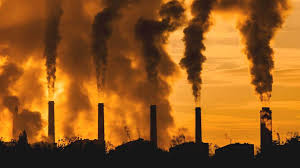

In [1]:
import numpy as np
import statistics as stat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from numpy import median

In [2]:
df = pd.read_csv('/media/wojciech/D6DE33C1DE339927/1/AirQualityUCI.csv', sep=";")

def green(text):
     print('\033[32m', text, '\033[0m', sep='') 

green(df.dtypes)
print()
print()
print(df.shape)

df.head(4)

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


(9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN


<span style="font-size: 110%;color:#1155cc"> niektóre zmienne przez to że jest przecinek zostały odczytane przez system jako dane tekstowe.Są to: CO(GT), C6H6(GT), T, RH, AH.  Trzeba to naprawić.

In [3]:
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.')
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.')
df['T'] = df['T'].str.replace(',', '.')
df['RH'] = df['RH'].str.replace(',', '.')
df['AH'] = df['AH'].str.replace(',', '.')
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
green(df.dtypes)

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


<span style="font-size: 110%;color:#1155cc"> Na pczątku sprawdzam jaki format maja dane

In [5]:
df.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

<span style="font-size: 110%;color:#1155cc"> przekształacm dane na format float

In [6]:
df[['CO(GT)','C6H6(GT)','T','RH','AH']] = df[['CO(GT)','C6H6(GT)','T','RH','AH']].astype(float)

In [7]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

<span style="font-size: 110%;color:#1155cc"> Format danych jest OK

# Spis zmiennych:

- <span style="font-size: 130%;color:#1155cc"> Date (DD/MM/YYYY)</span>
- <span style="font-size: 130%;color:#1155cc"> Time (HH.MM.SS)</span>
- <span style="font-size: 130%;color:#1155cc"> CO(GT)</span> - Rzeczywiste uśrednione stężenie CO w mg / m^3 (analizator referencyjny)
- <span style="font-size: 130%;color:#1155cc">  PT08.S1(CO)</span> - PT08.S1 (tlenek cyny) uśredniona godzinowa reakcja czujnika (nominalnie docelowy CO )
- <span style="font-size: 130%;color:#1155cc">  NMHC(GT)</span> - Rzeczywiste, uśrednione godzinowo ogólne stężenie węglowodorów niemetanowych w mikrog / m ^ 3 (analizator referencyjny)
- <span style="font-size: 130%;color:#1155cc">  C6H6(GT)</span> - Rzeczywiste uśrednione godzinowe stężenie benzenu w mikrog / m ^ 3 (analizator odniesienia)
- <span style="font-size: 130%;color:#1155cc">  PT08.S2(NMHC)</span> - PT08.S2 (tytani) uśredniona godzinowo odpowiedź czujnika (nominalnie NMHC docelowego)
- <span style="font-size: 130%;color:#1155cc">  NOx(GT)</span> - prawda godzinowa średnio stężenie NO w ppb (analizator odniesienia)
- <span style="font-size: 130%;color:#1155cc">  PT08.S3(NOx)</span> - PT08.S3 (tlenek wolframu) godzinowa średnio odpowiedź czujnika (nominalnie NOx docelowego)
- <span style="font-size: 130%;color:#1155cc">  NO2(GT)</span> - prawda godzinowa średnio stężenie NO2 w mcg / m ^ 3 (analizator referencyjny)
- <span style="font-size: 130%;color:#1155cc">  PT08.S4(NO2)</span> - PT08.S4 (tlenek wolframu) uśredniona godzinowa 
- <span style="font-size: 130%;color:#1155cc">  PT08.S5</span> - PT08.S5 (tlenek indu) uśredniona godzinowo odpowiedź czujnika (nominalnie docelowa O3)
- <span style="font-size: 130%;color:#1155cc">T</span> - Temperatura w ° C
- <span style="font-size: 130%;color:#1155cc">RH</span> - Wilgotność względna (%)
- <span style="font-size: 130%;color:#1155cc">AH</span> - AH Wilgotność bezwzględna




<span style="font-size: 110%;color:#1155cc"> Wycinanie zakresu do badań
    
<span style="font-size: 110%;color:red"> BEZ ZMIAN - danych jest mało

In [8]:
df = df.sample(frac = 1.00, random_state=148)
df.shape

(9471, 17)

<span style="font-size: 150%;color:WHITE; background:BLACK">USUWANIE BRAKÓW</span>    

<span style="font-size: 110%;color:#1155cc"> Sprawdzam czy są braki w danych.
        
<span style="font-size: 110%;color:red"> BRAK DZIUR   

In [9]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

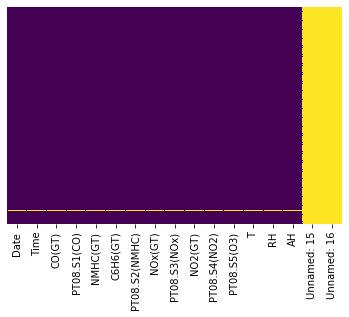

In [10]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<span style="font-size: 110%;color:#1155cc"> Widać że braki występują wyłącznie w dwóch ostatnich kolumnach i w jakimś jednorodym okresie kiedy prawdopodobnie wyłaczono stację.Usuwamy te braki!

In [11]:
del df['Unnamed: 15']
del df['Unnamed: 16']

In [12]:
df = df.dropna(how = 'all')

In [13]:
green(df.shape)
df.isnull().sum()

(9357, 15)


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

<span style="font-size: 110%;color:#1155cc"> Dane są oczyszczone, teraz sprawdzamy jaki jest poziom ubzdrurowienia danych jakie są ukryte błędy.

In [14]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


<span style="font-size: 110%;color:#1155cc"> Nie podobają mi sie ujemne wartości: -200 w poziomach niektórych składników chemicznych.

<span style="font-size: 110%;color:#1155cc">Prawdopodobnie część czujników się wyłaczyła - a stan ich wyłaczenia oznaczono jako -200. Takich sytuacji było 366 razy i dotyczyło większości wskaźników. Podejmuję decyzję o skasowaniu ich. 

In [15]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [16]:
foka = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']

<span style="font-size: 150%;color:WHITE; background:RED">TU MOŻNA ZASTOSOWAĆ PĘTLE</span> 

In [17]:
df['CO(GT)'] = df['CO(GT)'].apply(lambda x: np.nan if x == -200 else x)
df['PT08.S1(CO)'] = df['PT08.S1(CO)'].apply(lambda x: np.nan if x == -200 else x)
df['NMHC(GT)'] = df['NMHC(GT)'].apply(lambda x: np.nan if x == -200 else x)
df['C6H6(GT)'] = df['C6H6(GT)'].apply(lambda x: np.nan if x == -200 else x)
df['PT08.S2(NMHC)'] = df['PT08.S2(NMHC)'].apply(lambda x: np.nan if x == -200 else x)
df['PT08.S3(NOx)'] = df['PT08.S3(NOx)'].apply(lambda x: np.nan if x == -200 else x)
df['PT08.S4(NO2)'] = df['PT08.S4(NO2)'].apply(lambda x: np.nan if x == -200 else x)
df['NO2(GT)'] = df['NO2(GT)'].apply(lambda x: np.nan if x == -200 else x)
df['PT08.S4(NO2)'] = df['PT08.S4(NO2)'].apply(lambda x: np.nan if x == -200 else x)
df['PT08.S5(O3)'] = df['PT08.S5(O3)'].apply(lambda x: np.nan if x == -200 else x)

(9357, 15)
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)             0
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                   0
RH                  0
AH                  0
dtype: int64


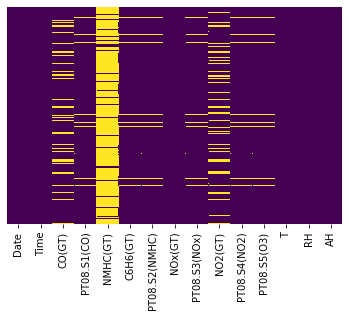

In [18]:
green(df.shape)
print(df.isnull().sum())
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<span style="font-size: 110%;color:#1155cc"> Jest dużo problemów typu -200. Napewno: NMHC(GT) idzie do kasacji.

In [19]:
del df['NMHC(GT)']

<span style="font-size: 110%;color:#1155cc"> Teraza skasujemy wszystkie rekordy z wartością -200 

In [20]:
df = df.dropna(how='any')
green(df.shape)
print(df.isnull().sum())

(6941, 14)
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


<span style="font-size: 110%;color:#1155cc">Jeszcze raz sprawdzamy czy dane nie sa zanieczyszczone bzdurami.

In [21]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


<span style="font-size: 110%;color:#1155cc">Znowu mamy to samo wyłączanie niektórych wskaźników. Można by to wykorzystać w modelu ale ja to skasuje - jak modele wyją słabe wtedy pomysle czy to wykorzystać. Teraz to kasuje.

(6941, 14)
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


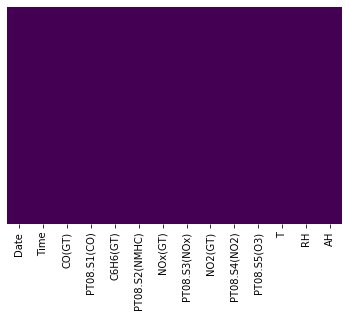

In [22]:
green(df.shape)
print(df.isnull().sum())
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<span style="font-size: 110%;color:#1155cc">Straciliśmy 30% danych ale dane są wyczyszczone

In [23]:
a,b = df.shape     #<- ile mamy kolumn
b

print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df.columns[i]
    r = df[i].isnull().sum()
    h = df[i].count()
    pr = (r/h)*100
   
    if r > 0:
        print(i,"--------",r,"--------",h,"--------",pr) 

NUMBER OF EMPTY RECORDS vs. FULL RECORDS
----------------------------------------


<span style="font-size: 110%;color:#1155cc">Dane nie mają braków. Szukam czy nie ma błędów. Zmienne nie mają błędów.

In [24]:
df.agg(['min', 'max', 'mean', 'median'])

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
min,01/01/2005,00.00.00,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
max,31/10/2004,23.00.00,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600
mean,NaN,NaN,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573
median,NaN,NaN,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900


<span style="font-size: 110%;color:#1155cc">jest jeszcze jedna zmienna która ma wartość -200 to jest 'CO(GT)' nie przeszła filtrów bo miała inny format
    

<span style="font-size: 110%;color:#1155cc">Ostatni raz sparadzam jaki jest format

In [25]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

<span style="font-size: 180%;color:#1155cc"> Rozbieramy datę na szczegóły

<span style="font-size: 110%;color:#1155cc">Ze zmiennych opisujących mamy jedynie datę i godzinę więc wyciskamy z tej zmiennej ile tylko się da.

<span style="font-size: 110%;color:#1155cc">Przyjmujemy format daty.

In [26]:
df[['Date','Time']].head()

,Date,Time
2853,07/07/2004,15.00.00
2923,10/07/2004,13.00.00
3284,25/07/2004,14.00.00
1524,13/05/2004,06.00.00
8202,15/02/2005,12.00.00


In [27]:
df['Date'] = pd.to_datetime(df.Date)

In [28]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [29]:
df.head(3)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2853,2004-07-07,15.00.00,1.8,1056.0,11.3,1024.0,159.0,792.0,121.0,1555.0,1068.0,41.0,11.6,0.8872
2923,2004-10-07,13.00.00,0.8,861.0,6.0,811.0,61.0,997.0,78.0,1409.0,509.0,33.3,19.2,0.9634
3284,2004-07-25,14.00.00,0.7,869.0,2.5,619.0,32.0,1163.0,44.0,1417.0,475.0,29.8,38.6,1.5911


In [30]:
df['year'] = df['Date'].dt.year
df['year'].unique()

array([2004, 2005])

In [31]:
df['month'] = df['Date'].dt.month
df['month'].unique()

array([ 7, 10,  5,  2,  9, 11,  6, 12,  1,  8,  3,  4])

In [32]:
df['week'] = df['Date'].dt.week
df['week'].unique()

array([28, 41, 30, 20,  7, 35, 46, 24, 52, 21, 53, 32, 37, 49, 23, 38, 39,
        2,  4, 12, 11, 26, 36, 14, 18,  9, 48, 17, 45, 15, 31,  1, 29, 13,
       33,  8, 50,  5, 10, 27, 22, 44,  3, 47, 16, 51, 19, 40,  6, 25, 42,
       43, 34])

In [33]:
df['week_day'] = df['Date'].dt.weekday
df['week_day'].unique()

array([2, 3, 6, 1, 5, 0, 4])

In [34]:
df['week_day_name'] = df['Date'].dt.weekday_name
df['week_day_name'].unique()

array(['Wednesday', 'Thursday', 'Sunday', 'Tuesday', 'Saturday', 'Monday',
       'Friday'], dtype=object)

In [35]:
df['day'] = df['Date'].dt.day
df['day'].unique()

array([ 7, 25, 13, 15,  3, 20, 10, 22, 19, 11,  2, 29,  6, 14, 28, 21, 16,
       23, 31, 12, 24,  4, 27,  5,  8, 17,  1,  9, 26, 30, 18])

In [36]:
df['haur'] = df['Date'].dt.hour
df['haur'].unique()

array([0])

In [37]:
df['Date']

2853   2004-07-07
2923   2004-10-07
3284   2004-07-25
1524   2004-05-13
8202   2005-02-15
          ...    
1248   2004-01-05
9169   2005-03-27
5582   2004-10-29
4019   2004-08-25
115    2004-03-15
Name: Date, Length: 6941, dtype: datetime64[ns]

<span style="font-size: 110%;color:#1155cc">Bierzemy się za godziny. przekształacamy je tak żeby dojść do formatu float.

In [38]:
df[['Date','Time']].head(3)

,Date,Time
2853,2004-07-07,15.00.00
2923,2004-10-07,13.00.00
3284,2004-07-25,14.00.00


In [39]:
df.Time.unique()

array(['15.00.00', '13.00.00', '14.00.00', '06.00.00', '12.00.00',
       '11.00.00', '01.00.00', '07.00.00', '17.00.00', '04.00.00',
       '00.00.00', '20.00.00', '02.00.00', '19.00.00', '05.00.00',
       '18.00.00', '23.00.00', '10.00.00', '22.00.00', '16.00.00',
       '09.00.00', '21.00.00', '08.00.00', '03.00.00'], dtype=object)

<span style="font-size: 110%;color:#1155cc">Widać, że nie mam minut są tylko pełne godziny więc tniemy i przekształacamy na pełne godziny

In [40]:
df.Time = df.Time.str.slice(0,2)
df.Time = df.Time.astype(int) 

<span style="font-size: 110%;color:#1155cc"> Teraz robimy podział na różne 6 pór dnia

In [41]:
Ewa = ['Noc','Rano', 'Południe','Popołudniu','Wieczór', 'PóźnyWieczór']

df['period'] = pd.qcut(df['Time'],6, labels=Ewa)

In [42]:
df['period'].unique()

[Popołudniu, Rano, Południe, Noc, Wieczór, PóźnyWieczór]
Categories (6, object): [Noc < Rano < Południe < Popołudniu < Wieczór < PóźnyWieczór]

In [43]:
pd.pivot_table(df, index= ['Time','period'], values= "CO(GT)", aggfunc= 'count')

,,CO(GT)
Time,period,
0,Noc,308.0
1,Noc,303.0
2,Noc,301.0
3,Noc,25.0
4,Noc,169.0
5,Noc,302.0
6,Rano,305.0
7,Rano,306.0
8,Rano,303.0


<span style="font-size: 110%;color:#1155cc"> Widzimy, że o godzinie 3 w nocy najczęściej była awaria -200

In [44]:
df.head(4)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),...,RH,AH,year,month,week,week_day,week_day_name,day,haur,period
2853,2004-07-07,15,1.8,1056.0,11.3,1024.0,159.0,792.0,121.0,1555.0,...,11.6,0.8872,2004,7,28,2,Wednesday,7,0,Popołudniu
2923,2004-10-07,13,0.8,861.0,6.0,811.0,61.0,997.0,78.0,1409.0,...,19.2,0.9634,2004,10,41,3,Thursday,7,0,Popołudniu
3284,2004-07-25,14,0.7,869.0,2.5,619.0,32.0,1163.0,44.0,1417.0,...,38.6,1.5911,2004,7,30,6,Sunday,25,0,Popołudniu
1524,2004-05-13,6,1.0,975.0,4.5,736.0,86.0,1069.0,85.0,1459.0,...,55.3,0.9910,2004,5,20,3,Thursday,13,0,Rano


<span style="font-size: 110%;color:#1155cc"> Sprawdzamy jakie numery maja poszczególne dni tygodnia. Okazuje się, że bardzo chaotyczny, sami więc nadajemy numery dniom tygodnia. 

In [45]:
pd.pivot_table(df, index= ['week_day_name','week_day'], values= "CO(GT)", aggfunc= 'count')

,,CO(GT)
week_day_name,week_day,
Friday,4,986
Monday,0,1071
Saturday,5,983
Sunday,6,1051
Thursday,3,981
Tuesday,1,916
Wednesday,2,953


<span style="font-size: 110%;color:#1155cc"> Sami nadajemy numery dni tygodnia według własnego uznania.

In [46]:
df['week_day'] = df['week_day_name'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6,'Sunday':7 },)
pd.pivot_table(df, index= ['week_day','week_day_name'], values= "CO(GT)", aggfunc= 'count')

,,CO(GT)
week_day,week_day_name,
1,Monday,1071
2,Tuesday,916
3,Wednesday,953
4,Thursday,981
5,Friday,986
6,Saturday,983
7,Sunday,1051


<span style="font-size: 110%;color:#1155cc"> Sami nadajemy numery pór dnia według własnego uznania.

In [47]:
df['period_code'] = df['period'].map({'Noc':1, 'Rano':2, 'Południe':3, 'Popołudniu':4, 'Wieczór':5, 'PóźnyWieczór':6},)
pd.pivot_table(df, index= ['period_code','period'], values= "CO(GT)", aggfunc= 'count')

,,CO(GT)
period_code,period,
1,Noc,1408.0
2,Rano,914.0
3,Południe,1238.0
4,Popołudniu,1226.0
5,Wieczór,1233.0
6,PóźnyWieczór,922.0


<span style="font-size: 110%;color:#1155cc"> Wycinamy miesiące do nauki modelu i miesiące do sprawdzenia modelu.

In [48]:
del df['week_day_name']
del df['period']

df.month.value_counts()

3     1035
11     657
1      654
6      596
2      593
5      544
9      527
12     515
7      504
10     493
8      433
4      390
Name: month, dtype: int64

<span style="font-size: 180%;color:#1155cc"> Zmiana formatu zmiennych niezależnych</span> 

Które z tych funkcji są kategoryczne?

Stawiam dwa warunki: 

1. funkcja jest kategoryczna bo ma format 'object'
2. funkcja jest kategoryczna bo ma do 24 unikalnych wartości

In [49]:
a,b = df.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    h = df[i].nunique()
    
    if f == np.object or h<=24:
        print(i,"---",f,"---",h)

ONLY DISCRETE FUNCTION
----------------------
Time --- int64 --- 24
year --- int64 --- 2
month --- int64 --- 12
week_day --- int64 --- 7
haur --- int64 --- 1
period_code --- category --- 6


<span style="font-size: 110%;color:#1155cc">Sprawdzamy format danych 

In [50]:
green(df.dtypes)

Date             datetime64[ns]
Time                      int64
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
year                      int64
month                     int64
week                      int64
week_day                  int64
day                       int64
haur                      int64
period_code            category
dtype: object


<span style="font-size: 110%;color:#1155cc">Zmienne dyskretne mają format 'int64' a powinny mieć 'category'.

In [51]:
df.dtypes

Date             datetime64[ns]
Time                      int64
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
year                      int64
month                     int64
week                      int64
week_day                  int64
day                       int64
haur                      int64
period_code            category
dtype: object

In [52]:
df.dtypes

Date             datetime64[ns]
Time                      int64
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
year                      int64
month                     int64
week                      int64
week_day                  int64
day                       int64
haur                      int64
period_code            category
dtype: object

<span style="font-size: 150%;color:WHITE; background:#1155Cc">WYDZIELENIE ZBIORU</span>

<span style="font-size: 170%;color:#1155cc">MIESIĄCE

<span style="font-size: 110%;color:#1155cc"> Przyjmujemy, że miesiące będą służyły do nauki modelu a miesiąc 12 do sprawdzenia modelu

In [53]:
df5 = df[(df['month']==12)]
df6 = df[(df['month']!=12)]
print(df6.month.value_counts())
green(df5.month.value_counts())

3     1035
11     657
1      654
6      596
2      593
5      544
9      527
7      504
10     493
8      433
4      390
Name: month, dtype: int64
12    515
Name: month, dtype: int64


In [54]:
df6.head(2)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),...,T,RH,AH,year,month,week,week_day,day,haur,period_code
2853,2004-07-07,15,1.8,1056.0,11.3,1024.0,159.0,792.0,121.0,1555.0,...,41.0,11.6,0.8872,2004,7,28,3,7,0,4
2923,2004-10-07,13,0.8,861.0,6.0,811.0,61.0,997.0,78.0,1409.0,...,33.3,19.2,0.9634,2004,10,41,4,7,0,4


<span style="font-size: 180%;color:#1155cc"> Przegląd wartości unikalnych dla zmiennych dyskretnych

In [55]:
a,b = df6.shape     #<- ile mamy kolumn
b

import numpy as np

for i in range(1,b):
    i = df6.columns[i]
    h = df6[i].nunique()
    f = df6[i].dtypes
          
    print(f,'---nunique->',h,'---name->', i)

int64 ---nunique-> 24 ---name-> Time
float64 ---nunique-> 91 ---name-> CO(GT)
float64 ---nunique-> 995 ---name-> PT08.S1(CO)
float64 ---nunique-> 385 ---name-> C6H6(GT)
float64 ---nunique-> 1174 ---name-> PT08.S2(NMHC)
float64 ---nunique-> 868 ---name-> NOx(GT)
float64 ---nunique-> 1107 ---name-> PT08.S3(NOx)
float64 ---nunique-> 274 ---name-> NO2(GT)
float64 ---nunique-> 1530 ---name-> PT08.S4(NO2)
float64 ---nunique-> 1637 ---name-> PT08.S5(O3)
float64 ---nunique-> 428 ---name-> T
float64 ---nunique-> 741 ---name-> RH
float64 ---nunique-> 5131 ---name-> AH
int64 ---nunique-> 2 ---name-> year
int64 ---nunique-> 11 ---name-> month
int64 ---nunique-> 50 ---name-> week
int64 ---nunique-> 7 ---name-> week_day
int64 ---nunique-> 31 ---name-> day
int64 ---nunique-> 1 ---name-> haur
category ---nunique-> 6 ---name-> period_code


In [56]:
a,b = df6.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df6.columns[i]
    f = df6[i].dtypes
    h = df6[i].nunique()
    
    if f == np.object or h<=24:
        print(i,"---",f,"---",h)

ONLY DISCRETE FUNCTION
----------------------
Time --- int64 --- 24
year --- int64 --- 2
month --- int64 --- 11
week_day --- int64 --- 7
haur --- int64 --- 1
period_code --- category --- 6


<span style="font-size: 150%;color:WHITE; background:#1155Cc">DO KODOWANIE zwykłe zostało juz przeprowadzone, podstawiamy zmienne kategoryczne do modeli


In [57]:
discrete_var = ['Time', 'month', 'week_day_name', 'period']

In [58]:
df6.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'year', 'month', 'week', 'week_day', 'day', 'haur',
       'period_code'],
      dtype='object')

In [59]:
df6.tail(3)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),...,T,RH,AH,year,month,week,week_day,day,haur,period_code
5582,2004-10-29,8,3.7,1370.0,22.8,1372.0,404.0,485.0,124.0,1945.0,...,20.8,64.7,1.5692,2004,10,44,5,29,0,2
4019,2004-08-25,5,0.7,913.0,4.4,730.0,47.0,883.0,50.0,1493.0,...,23.3,55.5,1.5636,2004,8,35,3,25,0,1
115,2004-03-15,13,2.9,1417.0,14.9,1146.0,171.0,830.0,119.0,1831.0,...,23.3,32.2,0.9096,2004,3,12,1,15,0,4


In [60]:
data_dummy = df6

def dummify_dataset(df6, col):
    dummy_column = pd.get_dummies(df6[col], prefix = col, drop_first = True)
    PKP = pd.concat([df6,dummy_column],axis = 1)
    PKP = PKP.drop([col], axis=1)
    return PKP


for i in range(0,4):
    data_dummy = dummify_dataset(data_dummy,discrete_var[i])

KeyError: 'week_day_name'

In [ ]:
df6.head(3)

In [ ]:
df7 = data_dummy 
df7.sample(3)

In [ ]:
df7.columns

 <span style="font-size: 110%;color:#1155cc"> wybieram odpowiednie kolumny do modelu

In [ ]:
df8 = df7.drop('Date', axis=1)

In [ ]:
df8.tail(3)

 <span style="font-size: 110%;color:#1155cc"> Podział zbioru na testowy i treningowy.

In [ ]:
from sklearn.model_selection import train_test_split 

y = df8['CO(GT)']
X = df8.drop('CO(GT)', axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state = 148)

<span style="font-size: 180%;color:#1155cc">Uruchamiam paczkę modeli regresji

<span style="font-size: 110%;color:#1155cc">Celem jest wybranie najlepszego modelu.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn import model_selection
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


import warnings   
warnings.filterwarnings("ignore")

modele = [KNeighborsRegressor(),
          DecisionTreeRegressor(),
          BaggingRegressor(),
          GradientBoostingRegressor(),
          LinearRegression(),
          AdaBoostRegressor(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          ExtraTreesRegressor(),
          RandomForestRegressor(),
          SVR()
          ] 

nazwy = ['K-Neighbors Regressor',
          'Decision Tree Regressor',
          'Bagging Regressor',
          'Gradient Boosting Regressor',
          'Linear Regression',
          'AdaBoost Regressor',
          'Ridge',
          'Huber Regressor',
          'Elastic Net CV',
          'ExtraTreesRegressor',
          'Random Forest Regressor',
          'Support Vector Regression'
          ]

In [ ]:
def model_val(t):
    
    global mean_dev,r2
    
    kfold = model_selection.KFold(n_splits=9, random_state=148)
    mean_dev = model_selection.cross_val_score(t, Xtrain, ytrain, cv=kfold, scoring='neg_mean_absolute_error')
    mean_dev = np.round(mean_dev, decimals=1)
    r2 = model_selection.cross_val_score(t, Xtrain, ytrain, cv=kfold, scoring='r2')
    r2 = np.round(r2, decimals=2)
    
    return mean_dev,r2

In [ ]:
def green(text):
     print('\033[32m', text, '\033[0m', sep='')
        
def red(text):
     print('\033[31m', text, '\033[0m', sep='')        

In [ ]:
for n,p in zip(nazwy,modele):      
    
    import matplotlib.pyplot as plt
    import time   
    
    start_time = time.time()
    
    results = model_val(p)
    print()
    red(n)
    print("-------------------------------cross_val, KFold = 9 ------")
    print('R2: ', r2)
    print('Mean_dev: ', mean_dev)
    
    # wykres
    
    plt.rc("font",size=14)
    clf = p
    clf.fit(Xtrain,ytrain)
    ypred = clf.predict(Xtest)

    ax = sns.regplot(ytest,ypred,color='grey')
    plt.title(n,color='r') 
    plt.ylabel('count', fontsize=12) 
    plt.xlabel('count', fontsize=12) 
    plt.show()
    
    # pomiar czasu
    n = (time.time() - start_time)
    n = np.round(n)
    print('time: %s seconds' % n)    
    print()

<span style="font-size: 180%;color:#1155cc">Tuning modeli 
    
<span style="font-size: 110%;color:#1155cc">Analiza cross validation bez szczególnych ustawień hiperparametrów, na pełnym zestawie zmiennych niezależnych pokazała, że istnieją trzy najlepsze modele regresji:

        - Bagging Regressor
        
<span style="font-size: 110%;color:#1155cc">Teraz należy udoskonalić te modele poprzez dobór hiperparametrów. 

 <span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja K-Neighbors Regressor</span> <span style="font-size: 150%;color:white;background:RED"> 43 sekundy

 <span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja Decision Tree Regressor</span> <span style="font-size: 150%;color:white;background:RED"> 1656 sekundy

 <span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'Bagging Regressor'

 <span style="font-size: 150%;color:white;background:#1155cc">  GradientBoostingRegressor</span> <span style="font-size: 150%;color:white;background:RED"> 239 sekund

 <span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja Linear Regression</span> <span style="font-size: 150%;color:white;background:RED"> 4 sekundy

In [ ]:
#from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
import time   
    
start_time = time.time()


parameters = [{'fit_intercept': [True, False], 'normalize': [True, False],'copy_X': [True, False]}]



Linear_Regression = GridSearchCV(LinearRegression(), parameters)
Linear_Regression.fit(Xtrain,ytrain)


print('Linear Regression:',Linear_Regression.best_score_)
print(Linear_Regression.best_params_)
print(Linear_Regression.best_estimator_)

    # wykres
    
plt.rc("font",size=14)
Linear_Regression.fit(Xtrain,ytrain)
ypred = Linear_Regression.predict(Xtest)

ax = sns.regplot(ytest,ypred,color='#45818e')
plt.title('Linear Regression:',color='#134f5c') 
plt.ylabel('count', fontsize=12) 
plt.xlabel('count', fontsize=12) 
plt.show()


# pomiar czasu
n = (time.time() - start_time)
n = np.round(n)
print('time: %s seconds' % n)  

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'AdaBoostRegressor'</span> <span style="font-size: 150%;color:white;background:RED"> 4 sekundy

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'Ridge'</span> <span style="font-size: 150%;color:white;background:RED"> 4 sekundy

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'HuberRegressor()'</span> <span style="font-size: 150%;color:white;background:RED"> 71 sekund 

In [ ]:
#from sklearn.dummy import DummyRegressor
from sklearn.linear_model import HuberRegressor
import time   
    
start_time = time.time()


parameters = [{
 'max_iter': [50, 100, 150],
 'epsilon' : [1.0, 1.25, 1.50],
 'alpha': [0.0001, 0.0005,0.001,0.0002]
 }]



Huber_Regressor = GridSearchCV(HuberRegressor(), parameters)
Huber_Regressor.fit(Xtrain,ytrain)


print('Huber Regressor:',Huber_Regressor.best_score_)
print(Huber_Regressor.best_params_)
print(Huber_Regressor.best_estimator_)

    # wykres
    
plt.rc("font",size=14)
Huber_Regressor.fit(Xtrain,ytrain)
ypred = Huber_Regressor.predict(Xtest)

ax = sns.regplot(ytest,ypred,color='#45818e')
plt.title('Huber Regressor:',color='#134f5c') 
plt.ylabel('count', fontsize=12) 
plt.xlabel('count', fontsize=12) 
plt.show()


# pomiar czasu
n = (time.time() - start_time)
n = np.round(n)
print('time: %s seconds' % n)  

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'ElasticNetCV()'</span> <span style="font-size: 150%;color:white;background:RED"> 417 sekund 

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'Random Forest Regressor'</span> <span style="font-size: 150%;color:white;background:RED"> 4 sekundy 

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'Extra Trees Regressor'</span> <span style="font-size: 150%;color:white;background:RED"> 4 sekundy 

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'SVR'</span> <span style="font-size: 150%;color:white;background:RED"> 4 sekundy 

 <span style="font-size: 150%;color:white;background:#674ea7"> SPRAWDZENIE JAK PROGNOZUJE MODEL
    
<span style="font-size: 110%;color:#1155cc">uruchamiamy teraz tą część Która miała służyć do sprawdzenia modelu: miesiąc 12    

<span style="font-size: 110%;color:#1155cc"> PRZYGOTOWANIE DANYCH DO UŻYCIA MODELI
    
<span style="font-size: 160%;color:#1155cc"> Miesiąc: 12    

In [ ]:
df9 = df[df['month']==12]
print(df9.shape)
df9.tail(3)

<span style="font-size: 150%;color:WHITE; background:#1155Cc">KODOWANIE NA GORĄCO</span>     

<span style="font-size: 110%;color:#1155cc">Wypisuje zmienne, które są dyskretne i które należy kodować na gorąco.

In [ ]:
discrete_var = ['Time', 'month', 'week_day_name', 'period']

In [ ]:
df9.columns

In [ ]:
print(df9.shape)
df9.tail(3)

In [ ]:
data_dummy = df9

def dummify_dataset(df6, col):
    dummy_column = pd.get_dummies(df6[col], prefix = col, drop_first = True)
    PKP = pd.concat([df6,dummy_column],axis = 1)
    PKP = PKP.drop([col], axis=1)
    return PKP


discrete_var = ['Time', 'month', 'week_day_name', 'period']

for i in range(0,4):
    data_dummy = dummify_dataset(data_dummy,discrete_var[i])

In [ ]:
df9.head(3)

In [ ]:
df10 = data_dummy 
df10.sample(3)

In [ ]:
df10.columns

 <span style="font-size: 110%;color:#1155cc"> wybieram odpowiednie kolumny do modelu

In [ ]:
df11 = df10.drop('Date', axis=1)

In [ ]:
print(df11.shape)
df11.tail(3)

<span style="font-size: 110%;color:#1155cc">Dzielimy zbiór zmienne niezależne i zmieną zależną.

In [ ]:
y = df11['CO(GT)']
X = df11.drop('CO(GT)', axis=1)

<span style="font-size: 110%;color:#1155cc">Sprawdzam jak sobie poradzą 3 wybrane modele.

<span style="font-size: 160%;color:#1155cc">Wybieram sobie model zoptymalizowany
    
Wykorzystujemy gotowy model, który jest już wcześniej zoptymalizowany    

In [ ]:
# Linear_Regression, ExtraTreesRegressor, Huber_Regressor


Linear_Regression = Linear_Regression.fit(X,y)
df11['Linear_Regression'] = Linear_Regression.predict(X)
df11['Linear_Regression'] = np.round(df11['Linear_Regression'], decimals=1)
y_pred = Linear_Regression.predict(X)
print('Linear_Regression r2:   %.2f' % r2_score(y, y_pred))

<span style="font-size: 160%;color:#1155cc">Extra Trees Regressor
    
Wykorzystujemy gotowy model, który jest już wcześniej zoptymalizowany        

In [ ]:
Huber_Regressor = Huber_Regressor.fit(X,y)
df11['Huber_Regressor'] = Huber_Regressor.predict(X)
df11['Huber_Regressor'] = np.round(df11['Huber_Regressor'], decimals=1)
y_pred = Huber_Regressor.predict(X)
print('Huber_Regressor r2:   %.2f' % r2_score(y, y_pred))

<span style="font-size: 150%;color:#1155cc">Tworzę komitet modeli w proporcji:
     
<div class="alert-info">

     60% ExtraTrees_Reg
     20% Bagging_Reg
     20% RandomForest_Reg
</div>

In [ ]:
df11['KM'] = (0.6*df11['Linear_Regression'])+(0.4*df11['Huber_Regressor'])

<span style="font-size: 110%;color:#1155cc"> Dodajemy zmienną 'dteday'

In [ ]:
df11['Date'] = df9['Date']

df11[['Date','Linear_Regression','Huber_Regressor','CO(GT)']].sample(10)

<span style="font-size: 150%;color:#1155cc">Graficzny przebieg procesu

In [ ]:
df11.reset_index
df11.set_index('Date', inplace=True)
df11[['KM','CO(GT)']].head(160).plot(figsize=(24,5))

<span style="font-size: 180%;color:#1155cc">Wizualizacja struktury

<span style="font-size: 110%;color:#1155cc"> DANE DYSKRETNE - WYŚWIETLAM ILOŚĆ DANYCH UNIKALNYCH W KAŻDEJ KATEGORII

In [ ]:
dkk = dk[['season','yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']]
categorical_vars=['season','yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
# robie przestrzeń między wykresami 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.3)
# pętla: mamy 9 zmiennych dyskretnych
for i, ax in enumerate(axes.ravel()):
    if i > 8:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=dkk, ax=ax)

<span style="font-size: 180%;color:#1155cc"> DANE CIĄGŁE

In [ ]:
sns.set(style="white")
_ = dk.hist(column=['windspeed' ,'hum','temp','cnt'], figsize = (8,8))

In [ ]:
def N_plots(df,x1,x2,by,title, x_title):

    plt.figure(dpi= 380)

    fig, axes = joypy.joyplot(df, column=[x1, x2], by=by, ylim='own', figsize=(12,8), legend=True, color=['#f4cccc', '#0c343d'], alpha=0.4)
    # color=['#76a5af', '#134f5c']
    # color=['#f4cccc', '#0c343d']
    # color=['#a4c2f4', '#1c4587']
    #color=['#e06666', '#d9d9d9']
    #color=['#e06666', '#434343']
    #color=['#b6d7a8','#6aa84f']
    
    # Decoration
    plt.title(title, fontsize=22, color='#d0e0e3', alpha=0.9)
    plt.rc("font", size=20)
    plt.xlabel(x_title,  fontsize=16, color='darkred', alpha=1)
    #plt.ylabel('Data Scientist', fontsize=26,  color='grey', alpha=0.8)

    plt.show

<span style="font-size: 180%;color:#1155cc">Ilość rowerów zależnie od temperatury i wilgotności w miesiącach

In [ ]:
import joypy
import pandas as pd
import matplotlib.pyplot as plt

df=df
x1='temp'
x2='hum'
by='mnth'
title = 'Ilość rowerów zależnie od temperatury i wilgotności w miesiącach'
x_title = 'Temperatura i wilgotność'

N_plots(df,x1,x2,by,title, x_title)

<span style="font-size: 180%;color:#1155cc">Częstotliwość wypożyczania rowerów w roku 2011

In [ ]:
import matplotlib as mpl
import calmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/home/wojciech/Pulpit/11/hour.csv', parse_dates=['dteday'])
df.set_index('dteday', inplace=True)

In [ ]:
plt.figure(figsize=(16,10), dpi= 280)
calmap.calendarplot(df['2011']['cnt'],cmap= 'YlOrBr', fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':24}, subplot_kws={'title':'Częstotliwość wypożyczania rowerów w roku 2011'})
plt.show()

<span style="font-size: 180%;color:#1155cc">Wypożyczanie rowerów w godzinach zależnie od sezonu

In [ ]:
fig,ax = plt.subplots(figsize = (18,6))
sns.pointplot(data=df[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax)
ax.set(title="Wypożyczanie rowerów w godzinach zależnie od sezonu")

In [ ]:
df.columns

<span style="font-size: 180%;color:#1155cc">Wypożyczanie rowerów zależnie od miesiąca

In [ ]:
fig,ax = plt.subplots(figsize = (18,6))
sns.barplot(data=df[['mnth',
                           'cnt']],
              x='mnth',
              y='cnt',
              ax=ax)
ax.set(title="Miesięczny poziom wypożyczeń")

<span style="font-size: 180%;color:#1155cc">Wypożyczanie rowerów zależnie od godzin

In [ ]:
fig,ax = plt.subplots(figsize = (18,6))
sns.boxplot(data=df[['cnt',
                          'hr']],x='hr',y='cnt',ax=ax)
ax.set(title="Checking for outliners in day hours")

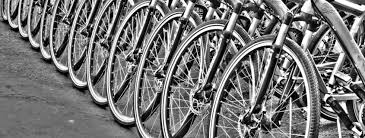 